In [26]:
!pip install squarify

### 1. Import packages 

In [3]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Import P3_ecommerce.csv file

In [4]:
data = pd.read_excel('/Users/doanthinh/Downloads/Học Data/Python/project/Project 3/Đề/Final_project_RFM/P3_ecommerce retail.xlsx')
data = pd.DataFrame(data)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### 3. Explore data 

In [5]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.0000

object = mix data type 

### 4. Clean data 

#### InvoiceNo and StockCode

In [6]:
columns_to_clean = ['InvoiceNo','StockCode']

for column in columns_to_clean:
    # Convert column to numeric, coercing non-numeric values to NaN
    data[column] = pd.to_numeric(data[column], errors='coerce', downcast='integer')

    # Drop rows with NaN values in the column
    data = data.dropna(subset=[column])

    # Convert column to integers
    data[column] = data[column].astype(int)

    # Check the column's data type
    column_type = data[column].dtype
    print(f"{column}: {column_type}")

# Print the updated DataFrame
data

InvoiceNo: int64
StockCode: int64


/var/folders/xb/znx9n6tj45z9d5k19spxr_8c0000gn/T/ipykernel_18741/268059405.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].astype(int)
/var/folders/xb/znx9n6tj45z9d5k19spxr_8c0000gn/T/ipykernel_18741/268059405.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = pd.to_numeric(data[column], errors='coerce', downcast='integer')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [7]:
#### Quantity >=0, CustomerID have blank 

In [8]:
# eliminate negative values in Quantity 
data = data[data['Quantity'] >= 0]
# eliminate null value in CustomerID 
data = data.dropna(subset=['CustomerID'])
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### 5. Select fields that need for RFM 

In [9]:
# Select fields
data = data.iloc[:, [0, 1, 3, 4, 5, 6]]
data

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0
5,536365,22752,2,2010-12-01 08:26:00,7.65,17850.0
6,536365,21730,6,2010-12-01 08:26:00,4.25,17850.0
7,536366,22633,6,2010-12-01 08:28:00,1.85,17850.0
8,536366,22632,6,2010-12-01 08:28:00,1.85,17850.0
...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0
541905,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0
541906,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0
541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0


### 6. Calculate R,F,M group by CustomerID

#### Convert InvoiceDate to datetime

In [29]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

#### Recency

In [11]:
# Calculate Recency (R) based on the maximum date
max_date = pd.to_datetime('31/12/2011', format='%d/%m/%Y')
data.loc[:, 'Recency'] = (max_date - data['InvoiceDate']).dt.days
data

/var/folders/xb/znx9n6tj45z9d5k19spxr_8c0000gn/T/ipykernel_18741/4254910854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Recency'] = (max_date - data['InvoiceDate']).dt.days


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Recency
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,394
5,536365,22752,2,2010-12-01 08:26:00,7.65,17850.0,394
6,536365,21730,6,2010-12-01 08:26:00,4.25,17850.0,394
7,536366,22633,6,2010-12-01 08:28:00,1.85,17850.0,394
8,536366,22632,6,2010-12-01 08:28:00,1.85,17850.0,394
...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,21
541905,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,21
541906,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,21
541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,21


#### Frequency

In [12]:
# Calculate Frequency (F) by counting the number of unique InvoiceNos for each CustomerID

data.loc[:, 'Frequency'] = data.groupby('CustomerID')['InvoiceNo'].transform('nunique')
data 

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Recency,Frequency
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,394,34
5,536365,22752,2,2010-12-01 08:26:00,7.65,17850.0,394,34
6,536365,21730,6,2010-12-01 08:26:00,4.25,17850.0,394,34
7,536366,22633,6,2010-12-01 08:28:00,1.85,17850.0,394,34
8,536366,22632,6,2010-12-01 08:28:00,1.85,17850.0,394,34
...,...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,21,4
541905,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,21,4
541906,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,21,4
541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,21,4


#### Monetary

In [13]:
# Calculate Monetary (M) by multiplying Quantity and UnitPrice, then summing for each CustomerID
data['Monetary'] = data['Quantity'] * data['UnitPrice']

monetary_data = data.groupby('CustomerID')['Monetary'].sum().reset_index()

data = pd.merge(data, monetary_data, on='CustomerID', how='left', suffixes=('_by_cid', ''))
data

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Recency,Frequency,Monetary_by_cid,Monetary
0,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,394,34,20.34,3689.25
1,536365,22752,2,2010-12-01 08:26:00,7.65,17850.0,394,34,15.30,3689.25
2,536365,21730,6,2010-12-01 08:26:00,4.25,17850.0,394,34,25.50,3689.25
3,536366,22633,6,2010-12-01 08:28:00,1.85,17850.0,394,34,11.10,3689.25
4,536366,22632,6,2010-12-01 08:28:00,1.85,17850.0,394,34,11.10,3689.25
...,...,...,...,...,...,...,...,...,...,...
363114,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,21,4,10.20,790.81
363115,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,21,4,12.60,790.81
363116,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,21,4,16.60,790.81
363117,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,21,4,16.60,790.81


### 7.Calculate R,F,M score 

#### Recency Score

In [14]:
data['RecencyScore'] = pd.qcut(data['Recency'], q=5, labels=False, duplicates='drop') + 1
data

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Recency,Frequency,Monetary_by_cid,Monetary,RecencyScore
0,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,394,34,20.34,3689.25,5
1,536365,22752,2,2010-12-01 08:26:00,7.65,17850.0,394,34,15.30,3689.25,5
2,536365,21730,6,2010-12-01 08:26:00,4.25,17850.0,394,34,25.50,3689.25,5
3,536366,22633,6,2010-12-01 08:28:00,1.85,17850.0,394,34,11.10,3689.25,5
4,536366,22632,6,2010-12-01 08:28:00,1.85,17850.0,394,34,11.10,3689.25,5
...,...,...,...,...,...,...,...,...,...,...,...
363114,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,21,4,10.20,790.81,1
363115,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,21,4,12.60,790.81,1
363116,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,21,4,16.60,790.81,1
363117,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,21,4,16.60,790.81,1


#### Frequency Score

In [15]:
# Replace infinite values in the 'Frequency' column
data['Frequency'] = data['Frequency'].replace([np.inf, -np.inf], np.nan).fillna(0)

data['FrequencyScore'] = (pd.qcut(data['Frequency'], q=5, labels=False, duplicates='drop') + 1).astype(int)
data

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Recency,Frequency,Monetary_by_cid,Monetary,RecencyScore,FrequencyScore
0,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,394,34,20.34,3689.25,5,5
1,536365,22752,2,2010-12-01 08:26:00,7.65,17850.0,394,34,15.30,3689.25,5,5
2,536365,21730,6,2010-12-01 08:26:00,4.25,17850.0,394,34,25.50,3689.25,5,5
3,536366,22633,6,2010-12-01 08:28:00,1.85,17850.0,394,34,11.10,3689.25,5,5
4,536366,22632,6,2010-12-01 08:28:00,1.85,17850.0,394,34,11.10,3689.25,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
363114,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,21,4,10.20,790.81,1,2
363115,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,21,4,12.60,790.81,1,2
363116,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,21,4,16.60,790.81,1,2
363117,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,21,4,16.60,790.81,1,2


In [16]:
#### Monetary Score

In [17]:
data['MonetaryScore'] = pd.qcut(data['Monetary_by_cid'], q=5, labels=False, duplicates='drop') + 1
data

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Recency,Frequency,Monetary_by_cid,Monetary,RecencyScore,FrequencyScore,MonetaryScore
0,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,394,34,20.34,3689.25,5,5,4
1,536365,22752,2,2010-12-01 08:26:00,7.65,17850.0,394,34,15.30,3689.25,5,5,4
2,536365,21730,6,2010-12-01 08:26:00,4.25,17850.0,394,34,25.50,3689.25,5,5,5
3,536366,22633,6,2010-12-01 08:28:00,1.85,17850.0,394,34,11.10,3689.25,5,5,3
4,536366,22632,6,2010-12-01 08:28:00,1.85,17850.0,394,34,11.10,3689.25,5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
363114,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,21,4,10.20,790.81,1,2,3
363115,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,21,4,12.60,790.81,1,2,3
363116,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,21,4,16.60,790.81,1,2,4
363117,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,21,4,16.60,790.81,1,2,4


#### RFM Score 

In [18]:
data['RFM_Score'] = data['RecencyScore'].astype(str) + data['FrequencyScore'].astype(str) + data['MonetaryScore'].astype(str)
data['RFM_Score'] = data['RFM_Score'].astype(int)
data

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Recency,Frequency,Monetary_by_cid,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score
0,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,394,34,20.34,3689.25,5,5,4,554
1,536365,22752,2,2010-12-01 08:26:00,7.65,17850.0,394,34,15.30,3689.25,5,5,4,554
2,536365,21730,6,2010-12-01 08:26:00,4.25,17850.0,394,34,25.50,3689.25,5,5,5,555
3,536366,22633,6,2010-12-01 08:28:00,1.85,17850.0,394,34,11.10,3689.25,5,5,3,553
4,536366,22632,6,2010-12-01 08:28:00,1.85,17850.0,394,34,11.10,3689.25,5,5,3,553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363114,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,21,4,10.20,790.81,1,2,3,123
363115,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,21,4,12.60,790.81,1,2,3,123
363116,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,21,4,16.60,790.81,1,2,4,124
363117,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,21,4,16.60,790.81,1,2,4,124


### 8. Import segment table

In [19]:
seg_table = pd.read_excel('/Users/doanthinh/Downloads/Học Data/Python/project/Project 3/Đề/Final_project_RFM/Segment.xlsx')
seg_table

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


### 9. Grouping base on segment 

In [21]:
# Create a dictionary mapping RFM scores to segments
rfm_segment_mapping = {}

for index, row in seg_table.iterrows():
    rfm_scores = row['RFM Score'].replace(' ', '').split(',')
    segment = row['Segment']
    for rfm_score in rfm_scores:
        rfm_segment_mapping[rfm_score] = segment

# Create a new 'Segment' column based on RFM scores
data['Segment'] = data['RFM_Score'].astype(str).map(rfm_segment_mapping)

data

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Recency,Frequency,Monetary_by_cid,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Segment
0,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,394,34,20.34,3689.25,5,5,4,554,Champions
1,536365,22752,2,2010-12-01 08:26:00,7.65,17850.0,394,34,15.30,3689.25,5,5,4,554,Champions
2,536365,21730,6,2010-12-01 08:26:00,4.25,17850.0,394,34,25.50,3689.25,5,5,5,555,Champions
3,536366,22633,6,2010-12-01 08:28:00,1.85,17850.0,394,34,11.10,3689.25,5,5,3,553,Potential Loyalist
4,536366,22632,6,2010-12-01 08:28:00,1.85,17850.0,394,34,11.10,3689.25,5,5,3,553,Potential Loyalist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363114,581587,22613,12,2011-12-09 12:50:00,0.85,12680.0,21,4,10.20,790.81,1,2,3,123,Hibernating customers
363115,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,21,4,12.60,790.81,1,2,3,123,Hibernating customers
363116,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,21,4,16.60,790.81,1,2,4,124,At Risk
363117,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,21,4,16.60,790.81,1,2,4,124,At Risk


### 10. Select fields that need for visualisation

In [23]:
rfm = data.iloc[:, [ 5, 6, 7, 8, 9, 13, 14]]
rfm

,CustomerID,Recency,Frequency,Monetary_by_cid,Monetary,RFM_Score,Segment
0,17850.0,394,34,20.34,3689.25,554,Champions
1,17850.0,394,34,15.30,3689.25,554,Champions
2,17850.0,394,34,25.50,3689.25,555,Champions
3,17850.0,394,34,11.10,3689.25,553,Potential Loyalist
4,17850.0,394,34,11.10,3689.25,553,Potential Loyalist
...,...,...,...,...,...,...,...
363114,12680.0,21,4,10.20,790.81,123,Hibernating customers
363115,12680.0,21,4,12.60,790.81,123,Hibernating customers
363116,12680.0,21,4,16.60,790.81,124,At Risk
363117,12680.0,21,4,16.60,790.81,124,At Risk


### 11. Visualization 

#### Histogram 

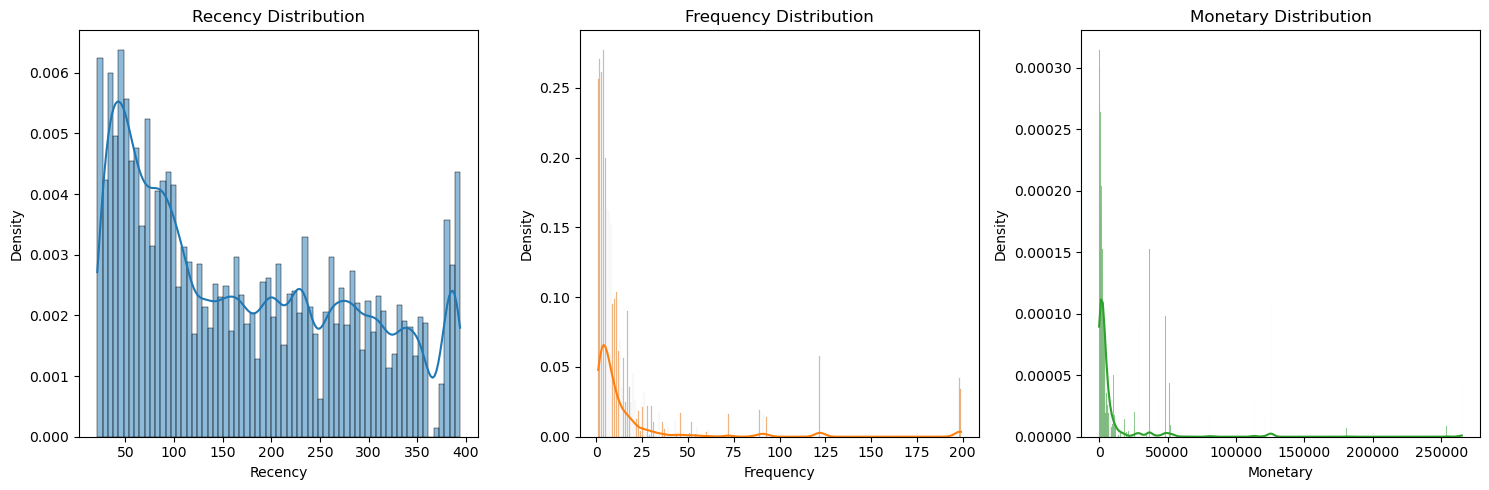

In [75]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Define the column names to create histograms for
columns_to_plot = ['Recency', 'Frequency', 'Monetary']

# Iterate through columns and plot histograms
for i, column in enumerate(columns_to_plot):
    sns.histplot(rfm[column], kde=True, ax=axes[i],stat='density', color='C'+str(i))
    axes[i].set_title(f'{column} Distribution')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### 12.Treemap 

#### Group the CustomerID and Monetary(total sales) by segment 

#### CustomerID

In [32]:
# Calculate segment counts
segment_counts = rfm.groupby('Segment')['CustomerID'].count().reset_index()
segment_counts.columns = ['Segment', 'CustomerCount']

# Merge the counts back to the original DataFrame
rfm = pd.merge(rfm, segment_counts, on='Segment', how='left')

# Drop the unnecessary columns
rfm = rfm.drop(['CustomerCount_x', 'CustomerCount_y'], axis=1)

# Display the resulting DataFrame
rfm

,CustomerID,Recency,Frequency,Monetary_by_cid,Monetary,RFM_Score,Segment,CustomerCount
0,17850.0,394,34,20.34,3689.25,554,Champions,21858
1,17850.0,394,34,15.30,3689.25,554,Champions,21858
2,17850.0,394,34,25.50,3689.25,555,Champions,21858
3,17850.0,394,34,11.10,3689.25,553,Potential Loyalist,67591
4,17850.0,394,34,11.10,3689.25,553,Potential Loyalist,67591
...,...,...,...,...,...,...,...,...
363114,12680.0,21,4,10.20,790.81,123,Hibernating customers,33027
363115,12680.0,21,4,12.60,790.81,123,Hibernating customers,33027
363116,12680.0,21,4,16.60,790.81,124,At Risk,51496
363117,12680.0,21,4,16.60,790.81,124,At Risk,51496


#### Monetary (total sales)

In [41]:
# Calculate segment-wise total Monetary
segment_monetary = rfm.groupby('Segment')['Monetary'].sum().reset_index()
segment_monetary.columns = ['Segment', 'TotalMonetary']

# Merge the total Monetary back to the original DataFrame
rfm = pd.merge(rfm, segment_monetary, on='Segment', how='left')

# Drop the unnecessary columns
rfm = rfm.drop(['TotalMonetary_x', 'TotalMonetary_y'], axis=1)

# Set the display format for floats
pd.options.display.float_format = '{:,.2f}'.format

# Display the resulting DataFrame
rfm

,CustomerID,Recency,Frequency,Monetary_by_cid,Monetary,RFM_Score,Segment,CustomerCount,TotalMonetary
0,"17,850.00",394,34,20.34,"3,689.25",554,Champions,21858,"760,798,006.35"
1,"17,850.00",394,34,15.30,"3,689.25",554,Champions,21858,"760,798,006.35"
2,"17,850.00",394,34,25.50,"3,689.25",555,Champions,21858,"760,798,006.35"
3,"17,850.00",394,34,11.10,"3,689.25",553,Potential Loyalist,67591,"775,771,657.50"
4,"17,850.00",394,34,11.10,"3,689.25",553,Potential Loyalist,67591,"775,771,657.50"
...,...,...,...,...,...,...,...,...,...
363114,"12,680.00",21,4,10.20,790.81,123,Hibernating customers,33027,"60,616,846.05"
363115,"12,680.00",21,4,12.60,790.81,123,Hibernating customers,33027,"60,616,846.05"
363116,"12,680.00",21,4,16.60,790.81,124,At Risk,51496,"911,807,566.64"
363117,"12,680.00",21,4,16.60,790.81,124,At Risk,51496,"911,807,566.64"


In [ ]:
### create new DataFrame group for create Treemap 

In [46]:
# Get unique combinations of 'Segment', 'CustomerID', and 'Monetary'
unique_segments = rfm[['Segment', 'CustomerID', 'Monetary']].drop_duplicates()

# Group by 'Segment' and aggregate unique combinations of 'CustomerID' and 'Monetary'
unique_segments = rfm.groupby('Segment').agg({'CustomerID': 'nunique', 'Monetary': 'nunique'}).reset_index()
unique_segments.columns = ['Segment', 'UniqueCustomerCount', 'UniqueMonetaryCount']

# Display the resulting DataFrame
unique_segments

,Segment,UniqueCustomerCount,UniqueMonetaryCount
0,About To Sleep,1585,1578
1,At Risk,1319,1319
2,Cannot Lose Them,1773,1765
3,Champions,375,375
4,Hibernating customers,1484,1481
5,Lost customers,859,859
6,Loyal,793,793
7,Need Attention,1068,1068
8,New Customers,1205,1197
9,Potential Loyalist,1265,1265


#### Treemap by Customer Segment

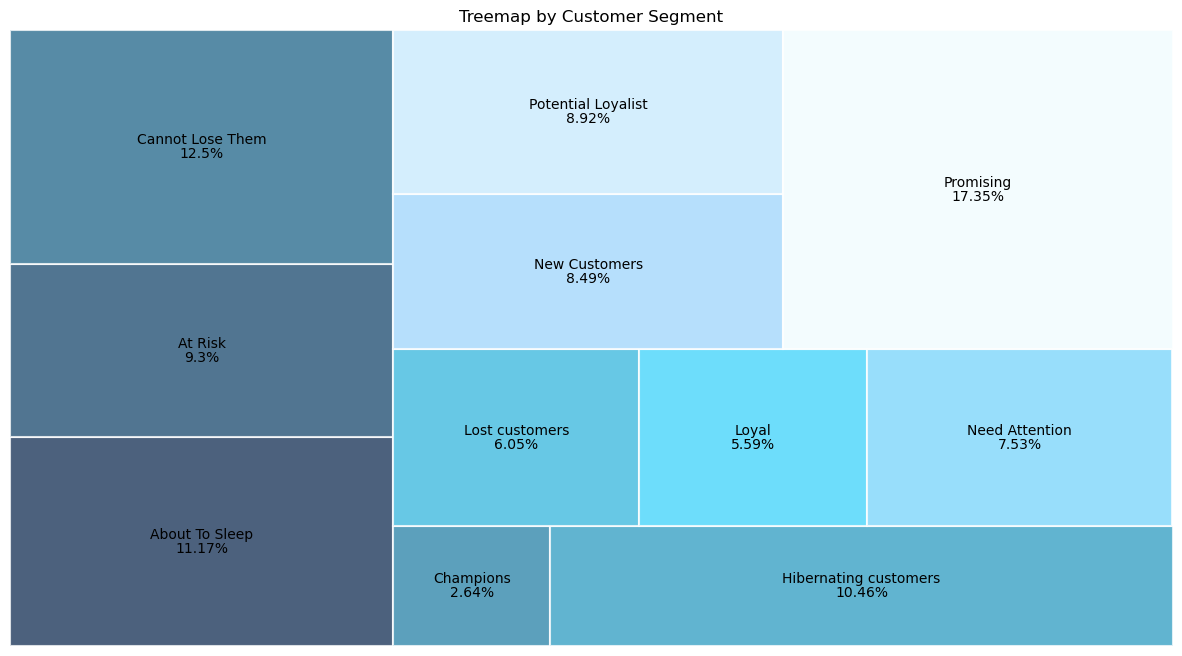

In [76]:
import squarify 

# Plot the treemap
fig, ax = plt.subplots(figsize=(15, 8))

sizes = unique_segments['UniqueCustomerCount'].copy()  # Make a copy to avoid the warning
label = unique_segments['Segment']
value = [f'{round(x*100/unique_segments["UniqueCustomerCount"].sum(), 2)}%' for x in sizes]
         
color = [ "#1F3A5C",
    "#265376",
    "#2D6E90",
    "#3388AB",
    "#3AA2C5",
    "#41BBDF",
    "#49D5FA",
    "#7FD6FB",
    "#A4D8FC",
    "#CAEAFD",
    "#F0FCFE" ] 

squarify.plot(sizes=sizes,
              label=label,
              value = value,
              alpha=0.8,
              color=color,
              bar_kwargs=dict(linewidth=1.5, edgecolor='white'))


plt.title('Treemap by Customer Segment')
plt.axis('off')
plt.show()

#### Treemap by Monetary(total sales) Segment

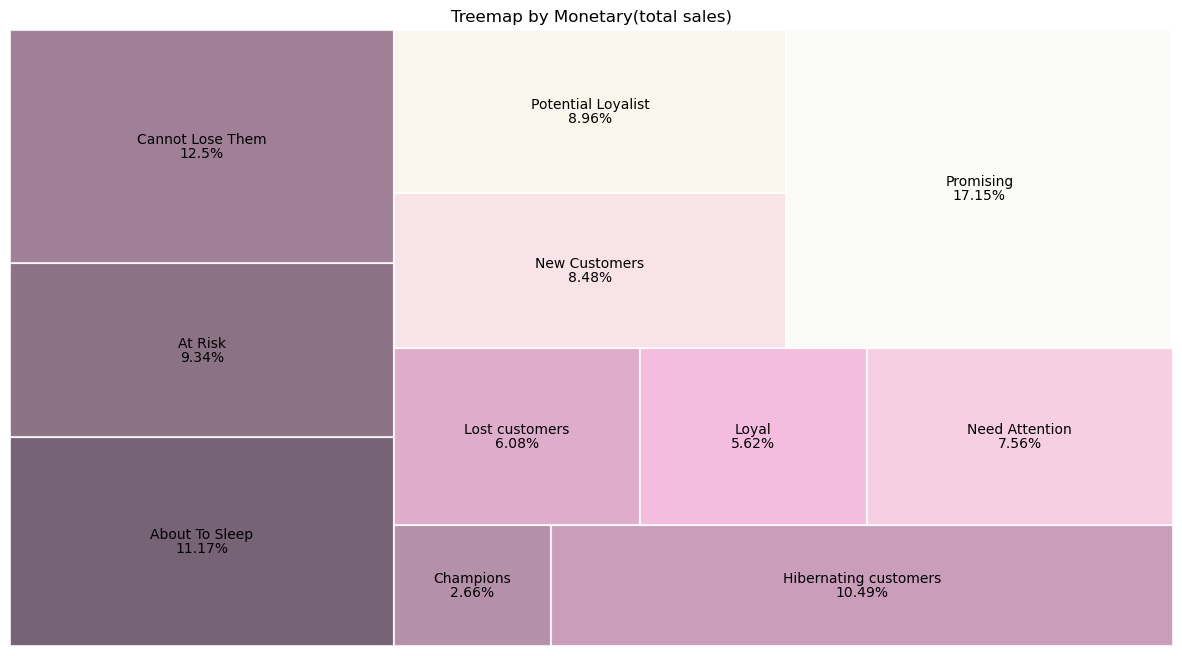

In [77]:
import squarify 

# Plot the treemap
fig, ax = plt.subplots(figsize=(15, 8))

sizes = unique_segments['UniqueMonetaryCount'].copy()  # Make a copy to avoid the warning
label = unique_segments['Segment']
value = [f'{round(x*100/unique_segments["UniqueMonetaryCount"].sum(), 2)}%' for x in sizes]
         
color = ["#543C52",
    "#6E4F67",
    "#89617D",
    "#A37494",
    "#BD86AA",
    "#D899C0",
    "#F2ABD6",
    "#F4C3DC",
    "#F6DCE3",
    "#F8F4E9",
    "#FAFAF5"] 

squarify.plot(sizes=sizes,
              label=label,
              value = value,
              alpha=0.8,
              color=color,
              bar_kwargs=dict(linewidth=1.5, edgecolor='white'))


plt.title('Treemap by Monetary(total sales)')
plt.axis('off')
plt.show()